_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

Variables --> Visual Encoding
- Income --> x
- Lifespan --> y
- Region _-> color
- Population --> size of buble
- Year --> animation frame (alternative: small multiple  several visualizations in a row/sequence -- horse in motion example on wikipedia)
- Country --> annotation

Qualitative --> Verbal
- Editoria/contextual explanation --> audio narration (alternative: text)


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## Upgrade Seaborn
Make sure you have the latest version 0.9.0
In Colab, go to **Restart runtime** after you run the `pip` command.

In [34]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 24.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [3]:
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
pd.options.display.max_columns = None

In [6]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [7]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [8]:
entities.head(10)

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america
5,akr_a_dhe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Akrotiri and Dhekelia,Akrotiri_Dhekelia,i2,NaN,True,NaN,NaN,NaN,NaN,coastline,NaN,NaN,NaN,Akrotiri and Dhekelia,NaN,False,NaN,NaN,europe,europe_central_asia
6,ala,NaN,√Öland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Åland,AX,i258,NaN,True,AX,ALA,248.0,NaN,coastline,60.25000,20.00000,NaN,Åland,NaN,False,AX,AALAND ISLANDS,europe,europe_central_asia
7,alb,NaN,NaN,NaN,NaN,Albania,NaN,NaN,NaN,NaN,NaN,NaN,others,Albania,AL,i3,upper_middle_income,True,AL,ALB,8.0,NaN,coastline,41.00000,20.00000,muslim,Albania,ALBANIA,True,AL,ALBANIA,europe,europe_central_asia
8,and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Andorra,AD,i6,high_income,True,AD,AND,20.0,NaN,landlocked,42.50779,1.52109,christian,Andorra,NaN,True,AD,ANDORRA,europe,europe_central_asia
9,ant,NaN,Neth. Antilles,NaN,NaN,Netherland Antilles,NaN,NaN,NaN,NaN,NaN,NaN,others,Netherlands Antilles,AN,i157,NaN,True,NaN,NaN,NaN,NaN,coastline,NaN,NaN,NaN,Netherlands Antilles,NaN,False,NaN,NETHERLANDS ANTILLES,americas,america


In [9]:
entities.landlocked.isna().sum()

18

In [10]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


In [11]:
concepts.shape

(590, 16)

In [12]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


### The Pandas Cheatsheet
https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

## Merge Data

In [0]:
pd.merge?

In [0]:
df = pd.merge(income, lifespan)

In [15]:
# we picked up an additional column -- success
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [16]:
# merge kept rows where both were same - so some data missing
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
#looking at merge options - inner join default
pd.merge?

In [18]:
# merging other columns -- from entities
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [19]:
# we want to be selective and not merge all columns
entities[entities.country =='abw'].T

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


In [20]:
entities.world_4region.value_counts()

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [21]:
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [22]:
# We'll go with the world_6region since it breaks some regions more
variables = ['country', 'name', 'world_6region']
# this is what we want to merge - yet we don't have same name for keys
# vs what's on df
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


In [0]:
df = pd.merge(df, population)

In [24]:
# preview of merge
pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


In [0]:
# we don't need 'geo' and 'country' anymore
df = pd.merge(df, entities[variables],
        how='inner', left_on='geo', right_on='country')

df.drop(columns=['geo', 'country'], inplace=True)

# Also, renaming some columns
df.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
}, inplace=True)

In [26]:
# Now we have 6 columns
df.shape

(41790, 6)

In [27]:
df.head()

,year,income,lifespan,population,country,region
0,1800,833,34.42,19286,Aruba,america
1,1801,833,34.42,19286,Aruba,america
2,1802,833,34.42,19286,Aruba,america
3,1803,833,34.42,19286,Aruba,america
4,1804,833,34.42,19286,Aruba,america


## Explore data

In [28]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [29]:
df.describe(include='all')

,year,income,lifespan,population,country,region
count,41790.000000,41790.000000,41790.000000,4.179000e+04,41790,41790
unique,NaN,NaN,NaN,NaN,194,6
top,NaN,NaN,NaN,NaN,Norway,europe_central_asia
freq,NaN,NaN,NaN,NaN,219,10991
mean,1909.357406,4778.593683,43.267181,1.332550e+07,NaN,NaN
std,63.322969,10502.602580,16.394240,6.502349e+07,NaN,NaN
min,1800.000000,247.000000,1.000000,2.128000e+03,NaN,NaN
25%,1854.000000,884.000000,31.200000,3.760282e+05,NaN,NaN
50%,1909.000000,1449.000000,35.500000,1.915244e+06,NaN,NaN
75%,1964.000000,3536.750000,56.340000,6.260147e+06,NaN,NaN


In [30]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Norway,europe_central_asia
freq,219,10991


In [31]:
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

In [0]:
# USA as variable datafreme
usa = df[df.country=='United States'] # boolean indexing

In [33]:
usa[usa.year.isin([1818, 1918, 2018])] #getting usa in certain years

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


In [34]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


In [35]:
# all for 2018
now = df[df.year==2018]
print(now.shape)
now.sample(10)

(188, 6)


,year,income,lifespan,population,country,region
1579,2018,8662,75.97,2934152,Armenia,europe_central_asia
10433,2018,46583,81.10,5754356,Denmark,europe_central_asia
3550,2018,3722,73.41,166368149,Bangladesh,south_asia
9510,2018,32205,80.79,1189085,Cyprus,europe_central_asia
28870,2018,38900,78.06,4829946,Oman,middle_east_north_africa
21815,2018,18254,75.47,6470956,Libya,middle_east_north_africa
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
2674,2018,691,61.14,11216450,Burundi,sub_saharan_africa
27994,2018,48542,81.92,17084459,Netherlands,europe_central_asia
30403,2018,32564,79.08,3659007,Puerto Rico,america


In [0]:
sns.relplot?

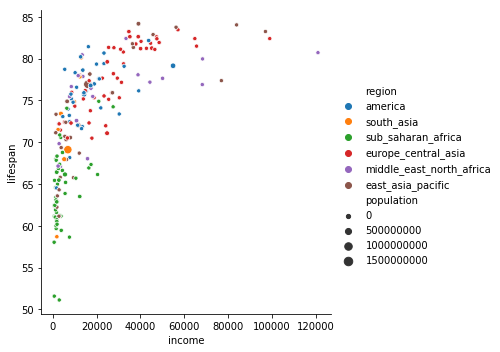

In [37]:
# plotting income, lifespan, population for now dataframe
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now);

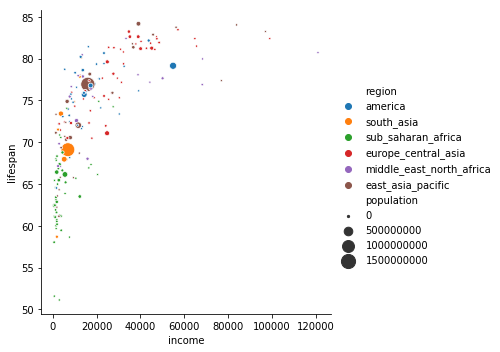

In [38]:
# playing with ploting options
# using 'size' and 'sizes' to increse buble size manually
sns.relplot(data=now,
           x='income',
           y='lifespan',
           hue='region',
           size='population',
           sizes=(5, 200));

## Analyze outliers

In [39]:
# Checking income greater than $80,000
# Outlier countries/regions
now[now.income > 80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [40]:
# Macao - according to Wikipedia considered an independent region
entities[entities.name == 'Macao, China'].T

,145
country,mac
alt_5,MACAU SPECIAL ADMINISTRATIVE REGION OF CHINA
alternative_1,Macau
alternative_2,Macao
alternative_3,"China, Macao SAR"
alternative_4_cdiac,Macau
arb1,"Macao SAR, China"
arb2,NaN
arb3,NaN
arb4,NaN


In [0]:
# Most extreme outlier - Qatar - Adding a label
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

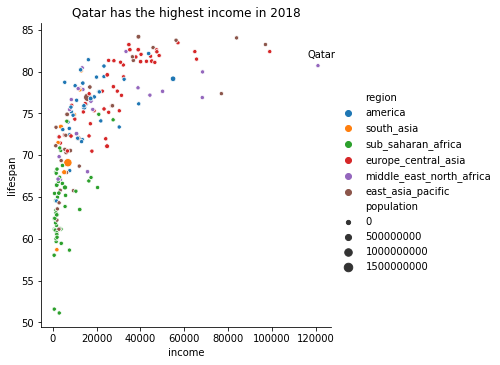

In [42]:
sns.relplot(x='income', y='lifespan', hue='region',
            size='population', data=now)
plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')
plt.title('Qatar has the highest income in 2018');

## Plot multiple years

In [0]:
# now =df[df.year==2018]

years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

In [44]:
centuries.sample(5)

,year,income,lifespan,population,country,region
12961,1918,613,8.55,26809,"Micronesia, Fed. Sts.",east_asia_pacific
18968,2018,8517,75.18,2898677,Jamaica,america
18311,2018,47356,82.60,337780,Iceland,europe_central_asia
18,1818,835,34.42,19462,Aruba,america
12623,2018,9422,65.75,912241,Fiji,east_asia_pacific


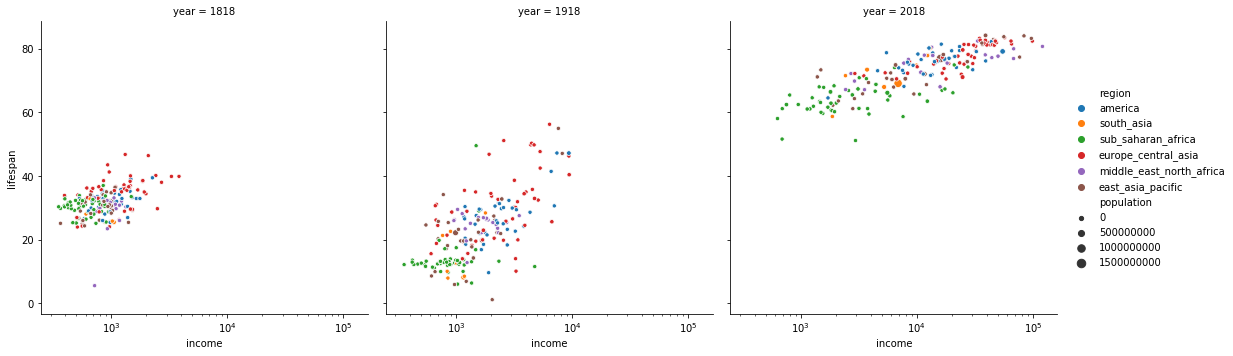

In [45]:
# plots showing sequence throughout the years
sns.relplot(x='income', y='lifespan', hue='region', size='population',
          col='year', data=centuries)
# scaling graph - quick approach
# in 1918 you see the impact of war and desease by the fall lifespan
plt.xscale('log');

### Consitent number of countries per year?

In [46]:
# There ARE the same number of countries in each graph -- year section
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [47]:
# countries shown less than 3 times
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country < 3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

## Point out a story

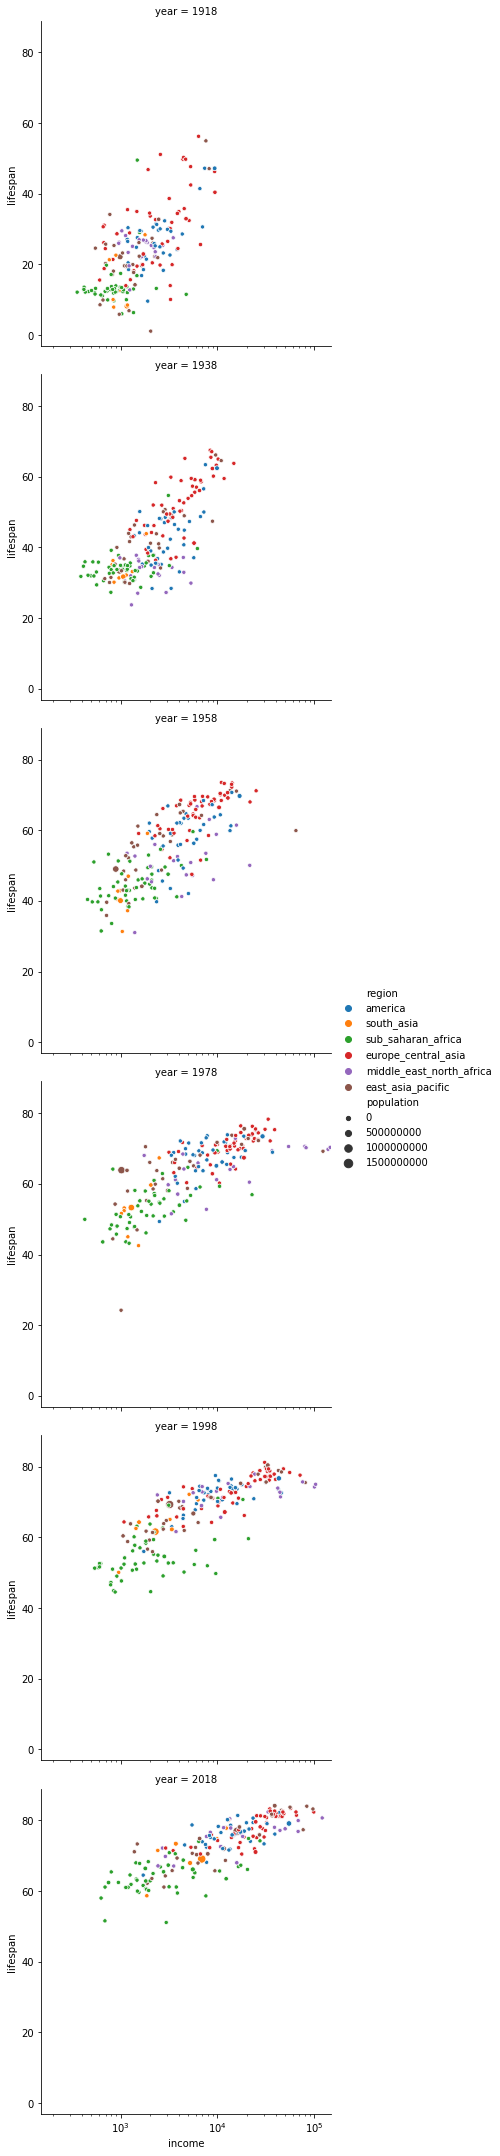

In [48]:
# going by increase of 20 years
years = [1918, 1938, 1958, 1978, 1998, 2018]
subset = df[df.year.isin(years)]
sns.relplot(x='income', y='lifespan', hue='region', size='population',
           row='year', data=subset)
plt.xscale('log')
plt.xlim((150, 150000));

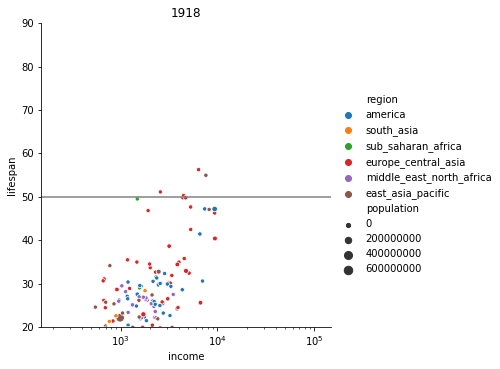

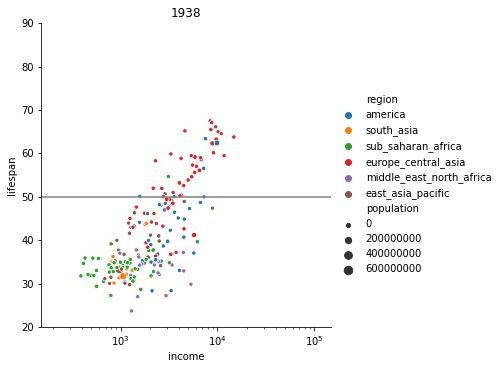

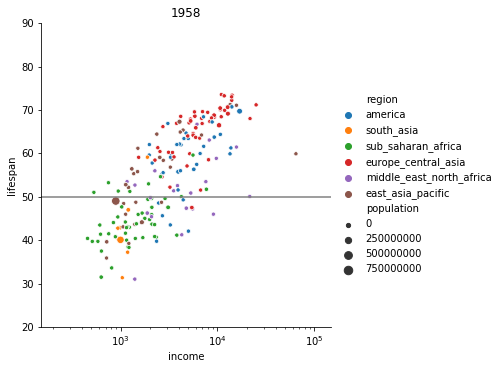

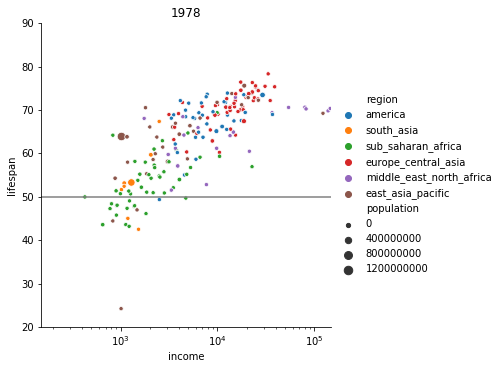

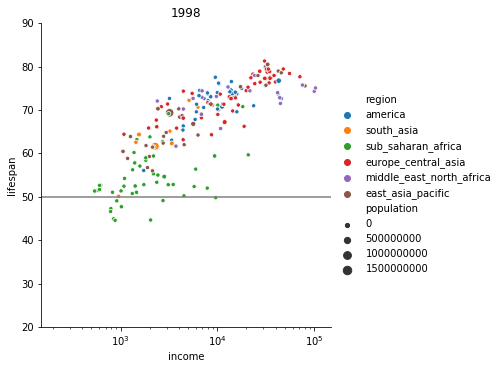

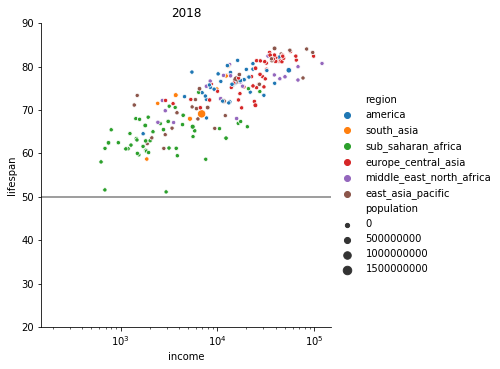

In [49]:
# years = [1918, 1938, 1958, 1978, 1998, 2018]
for year in years:
    
    sns.relplot(x='income', y='lifespan', hue='region', size='population',
               data=df[df.year==year])
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90))
    plt.title(year)
    plt.axhline(y=50, color='grey');

### 100 years ago, few contries had lifespans above 50 years

In [50]:
df[(df.year==1918) & (df.lifespan >= 50)]

,year,income,lifespan,population,country,region
1917,1918,7610,54.95,5066003,Australia,east_asia_pacific
10333,1918,6393,56.24,3165276,Denmark,europe_central_asia
18211,1918,2576,51.11,115504,Iceland,europe_central_asia
28113,1918,4479,50.28,2576646,Norway,europe_central_asia


### Today, no countries have lifespans below 50 years

In [51]:
df[(df.year==2018) & (df.lifespan < 5)]

,year,income,lifespan,population,country,region


In [52]:
# These though are close to the 50 yr lifespan line
df[(df.year==2018) & (df.lifespan < 55)]

,year,income,lifespan,population,country,region
6444,2018,689,51.58,4737423,Central African Republic,sub_saharan_africa
22472,2018,2960,51.12,2263010,Lesotho,sub_saharan_africa


## Get interactive with Google Colab

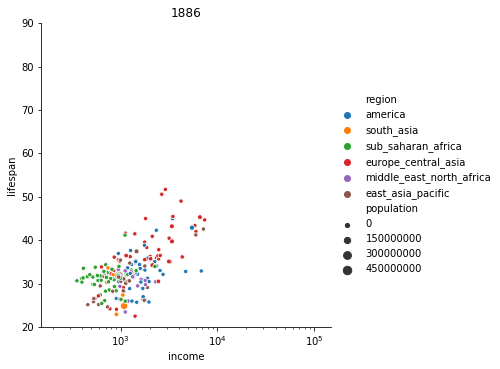

In [53]:
year = 1886 #@param {type:"slider", min:1800, max:2018, step:1}

sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            data=df[df.year==year])

plt.xscale('log')
plt.xlim((150, 150000))
plt.ylim((20, 90))
plt.title(year);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

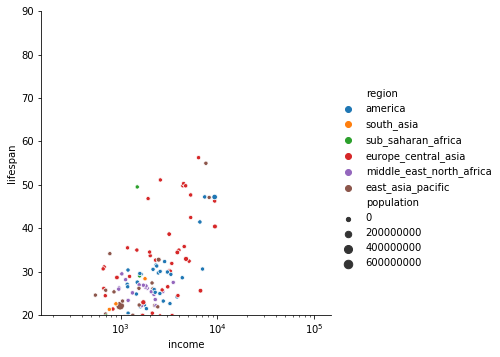

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

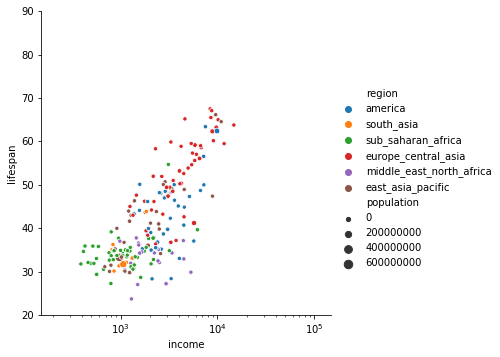

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

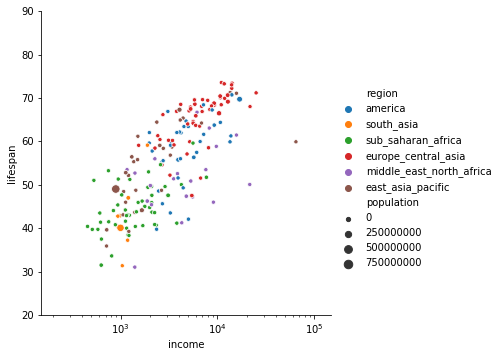

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

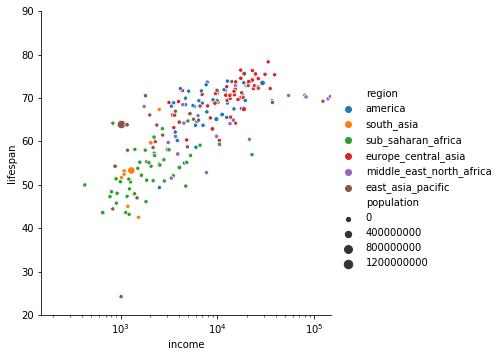

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

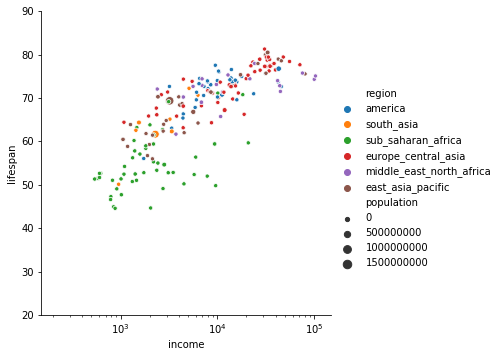

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

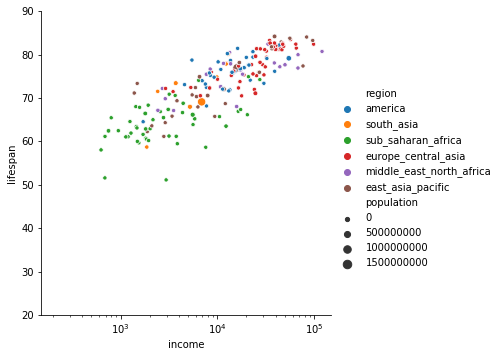

<IPython.core.display.Javascript object>

In [54]:
# Based on the example at: 
# https://colab.research.google.com/notebooks/widgets.ipynb#scrollTo=BZa2t-U5gIAB

from google.colab import widgets
tb = widgets.TabBar([str(year) for year in years])
for tab, year in zip(tb, years):
    sns.relplot(x='income', y='lifespan', hue='region', size='population', 
                data=df[df.year==year])

    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((20, 90));

## Stretch goals

## Additional tweaks to plot

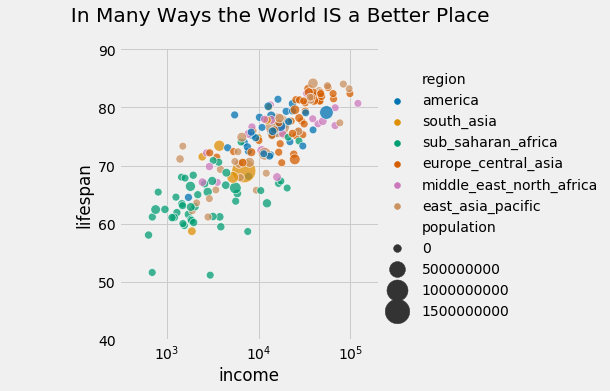

In [55]:
plt.style.use('fivethirtyeight')
sns.relplot(x='income', y='lifespan', hue='region',
            size='population', sizes = (60, 600),
            palette='colorblind', alpha=.75, data=now)
plt.xscale('log')
plt.ylim((40, 90))
plt.xlim(300, 200000)
plt.title('          In Many Ways the World IS a Better Place\n');

In [56]:
df.region.unique()

array(['america', 'south_asia', 'sub_saharan_africa',
       'europe_central_asia', 'middle_east_north_africa',
       'east_asia_pacific'], dtype=object)

In [0]:
asia_reg = ['south_asia', 'east_asia_pacific']
africas_reg=['sub_saharan_africa', 'middle_east_north_africa']

africas_df = df[df.region.isin(africas_reg)]
asias_df = df[df.region.isin(asia_reg)]
americas_df = df[df.region == 'america']
europe_df = df[df.region =='europe_central_asia']

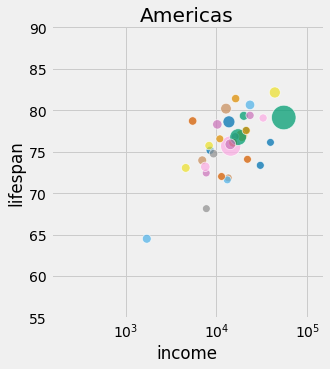

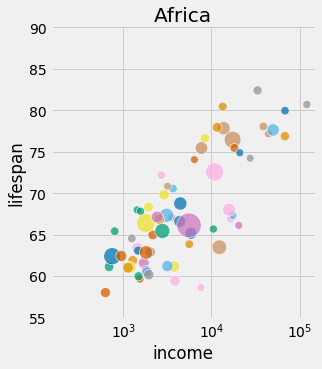

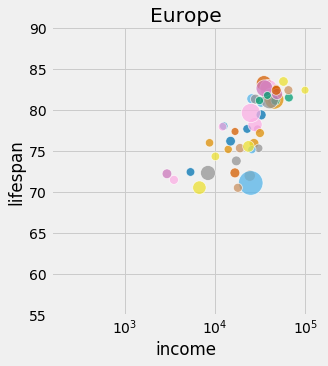

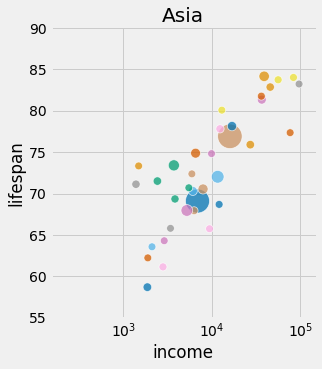

In [58]:
regions = [americas_df, africas_df, europe_df, asias_df]
reg_name = ['Americas', 'Africa', 'Europe', 'Asia']
count = 0
for region in regions:
    sns.relplot(x='income', y='lifespan', hue='country', size='population',
           sizes = (60, 600), palette='colorblind', legend=False,
           alpha=.75, data=region[region.year==2018])
    plt.xscale('log')
    plt.xlim((150, 150000))
    plt.ylim((55, 90))
    plt.title(reg_name[count])
    count+=1

## New Merged DataFrame

In [0]:
pd.merge?

In [0]:
# df1 -- New DataFrame
# 'income' and 'lifespan' inner join (default)
# selects records with matching values in both tables
df1 = pd.merge(income, lifespan)

In [61]:
df1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [62]:
df1 = pd.merge(df1, population)
df1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


In [63]:
entities.head(1)

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia


In [64]:
# Selecting columns we want from 'entities'
entities_cols = ['country', 'name', 'landlocked', 'world_6region', 'latitude', 'longitude']

# Merging df1 with selected 'entities' variables
df1 = pd.merge(df1, entities[entities_cols], how='inner', left_on='geo', right_on='country')
df1.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,landlocked,world_6region,latitude,longitude
0,abw,1800,833,34.42,19286,abw,Aruba,coastline,america,12.5,-69.96667
1,abw,1801,833,34.42,19286,abw,Aruba,coastline,america,12.5,-69.96667
2,abw,1802,833,34.42,19286,abw,Aruba,coastline,america,12.5,-69.96667
3,abw,1803,833,34.42,19286,abw,Aruba,coastline,america,12.5,-69.96667
4,abw,1804,833,34.42,19286,abw,Aruba,coastline,america,12.5,-69.96667


In [65]:
# We don't need these as reference anymore
df1.drop(columns=['geo', 'country'], inplace=True)
df1.head(1)

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,landlocked,world_6region,latitude,longitude
0,1800,833,34.42,19286,Aruba,coastline,america,12.5,-69.96667


In [0]:
# Renaming variables
df1 = df1.rename(columns={
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': 'region'
})

In [67]:
df1.head(1)

,year,income,lifespan,population,country,landlocked,region,latitude,longitude
0,1800,833,34.42,19286,Aruba,coastline,america,12.5,-69.96667


In [68]:
# Reordering variables -- want 'country' on front
cols = ['country','year','income','lifespan','population', 'landlocked', 'region', 'latitude', 'longitude']
df1 = df1[cols]

df1.head(2)

,country,year,income,lifespan,population,landlocked,region,latitude,longitude
0,Aruba,1800,833,34.42,19286,coastline,america,12.5,-69.96667
1,Aruba,1801,833,34.42,19286,coastline,america,12.5,-69.96667


In [71]:
# Double checking for NaNs -- merging drops NaNs
df1.isna().sum()

country       0
year          0
income        0
lifespan      0
population    0
landlocked    0
region        0
latitude      0
longitude     0
dtype: int64

In [72]:
df1.landlocked.unique()

array(['coastline', 'landlocked'], dtype=object)

In [0]:
# df1 by centuries
c_years = [1818, 1918, 2018]
century = df1[df1.year.isin(c_years)]

In [0]:
land_cent = century[century.landlocked == 'landlocked']
coast_cent = century[century.landlocked == 'coastline']

In [84]:
land_cent.head(3)

,country,year,income,lifespan,population,landlocked,region,latitude,longitude
237,Afghanistan,1818,604,28.03,3308390,landlocked,south_asia,33.0,66.0
337,Afghanistan,1918,849,7.89,5704092,landlocked,south_asia,33.0,66.0
437,Afghanistan,2018,1867,58.69,36373176,landlocked,south_asia,33.0,66.0


In [85]:
coast_cent.head(3)

,country,year,income,lifespan,population,landlocked,region,latitude,longitude
18,Aruba,1818,835,34.42,19462,coastline,america,12.5,-69.96667
118,Aruba,1918,1765,22.32,32202,coastline,america,12.5,-69.96667
218,Aruba,2018,39219,76.14,105670,coastline,america,12.5,-69.96667


## Progress of Landlocked and Coastline Countries Throughout the Centuries

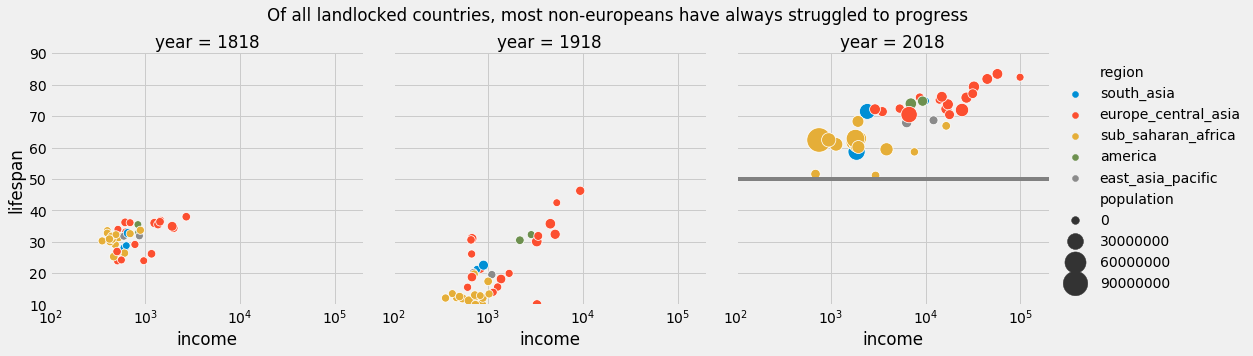

In [108]:
# Progress of landlocked countries throughout centuries
g = sns.relplot(x='income',
            y='lifespan',
            hue='region',
            size='population',
            sizes=(60, 600),
            col='year',
            data=land_cent)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Of all landlocked countries, most non-europeans have always struggled to progress')
plt.ylim(10, 90)
plt.xlim(100, 200000)
plt.axhline(y=50, color='grey')
plt.xscale('log');


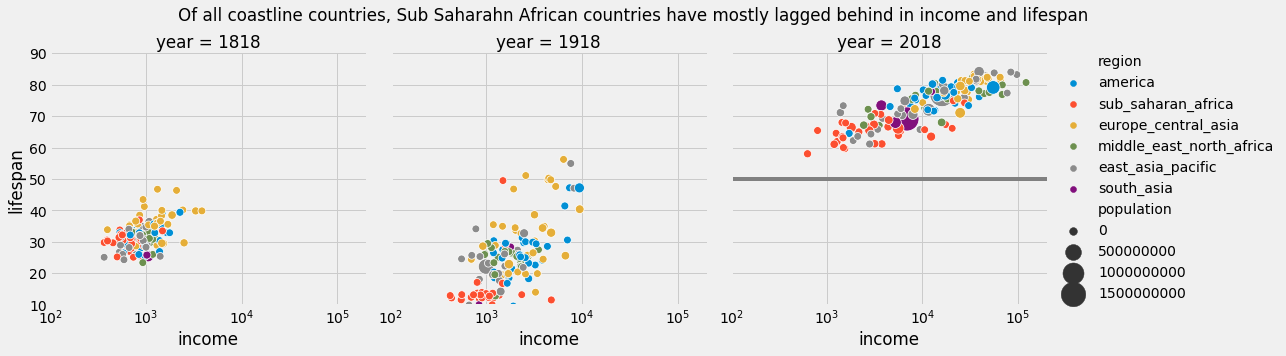

In [112]:
# Progress of countries with coastline throughout centuries
g = sns.relplot(x='income',
            y='lifespan',
            hue='region',
            size='population',
            sizes=(60, 600),
            col='year',
            data=coast_cent)

plt.subplots_adjust(top=0.85)
g.fig.suptitle('Of all coastline countries, Sub Saharahn African countries have mostly lagged behind in income and lifespan')
plt.ylim(10, 90)
plt.xlim(100, 200000)
plt.axhline(y=50, color='grey')
plt.xscale('log');